# Testing Plots for Affinity by binning Q2 and x for whole plot

Plan:
1. Filter all data in RDataFrame into a single Q2 and x bin
2. bin data into several qT/Q  z  binnings
3. plot affinity as the color

In [481]:
from ROOT import TFile,TTree,TCanvas,TH1F,gStyle,TLatex,gPad,TLegend,TLorentzVector,TH2F,TLine,TF1,TBox,RDataFrame,TPad,TF2
import ROOT
import numpy as np
import awkward as awk
import uproot
import pandas as pd
import matplotlib.pyplot as plot
import matplotlib as mpl
from pandas import read_excel 
from copy import deepcopy
from ipywidgets import *
import logging, os 
import time
logging.disable(logging.WARNING) 
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"

import tensorflow as tf
print("tf.__version__", tf.__version__)


tf.__version__ 2.7.0


In [482]:
# d_plus = RDataFrame("tree_MC_plus", "../OutputFiles/Slurm/Oct_20_run2/file_20*.root")
# d_minus = RDataFrame("tree_MC_minus", "../OutputFiles/Slurm/Oct_20_run2/file_20*.root")
# d_plus = RDataFrame("tree_MC_plus", "../OutputFiles/Slurm/Oct_26/file_*.root")
d_plus = RDataFrame("tree_MC_plus", "../OutputFiles/Slurm/Oct_27/file_*.root")


#Testing on a single file:
# d_plus = RDataFrame("tree_MC_plus", "../OutputFiles/Separate_Test_10_24/file3.root")
# d_plus = RDataFrame("tree_MC_plus", "../OutputFiles/Test_10_27/file1.root")


In [483]:
Q2bins = np.array([0,1.,1.4,2.0,2.8,4.0,5.6])# 6 Q2 bins
xbins = np.array([0,0.1,0.13,0.16,0.19,0.235,0.3,0.5])#7 x bins
zbins = np.array([0,0.35,0.43,0.49,0.55,0.62,0.7]) #9 z bins
qdivQ2bins = np.array(np.linspace(0,0.8,num=8)) #7 qdiv bins

Q2num = len(Q2bins)
xnum = len(xbins)
znum = len(zbins)
qdivnum = len(qdivQ2bins)

In [484]:
#Testing last bin only: Q2 = 11.1
xformat = "x <= {} && x > {}"
qdivformat = "q_TdivQ <= {} && q_TdivQ > {}"
Q2format = "Q2 <= {} && Q2 > {}"
zformat = "z <= {} && z > {}"
Mhformat = "Mh <= {} && Mh > {}"
Q2xbin = d_plus.Filter(xformat.format(xbins[xnum - 3],xbins[xnum - 4])).Filter(Q2format.format(Q2bins[Q2num - 3],Q2bins[Q2num - 4]))#.Filter("R0max < 0.3").Filter("R1max < 0.3").Filter("R2max < 0.3")

In [485]:
# i = 0
# j = 0
# # printbin = Q2xbin.Filter(qdivformat.format(qdivQ2bins[j+1],qdivQ2bins[j]))
# # printbin = Q2xbin.Filter(zformat.format(zbins[i+1],zbins[i]))
# print(printbin.Count().GetValue())

In [486]:
# c = TCanvas("c","c",1200,1000)
# h = Q2xbin.Histo2D(("h",";R0max ;z",100,0,1,100,0,1),"R0max", "q_TdivQ")
# h.Draw()
# c.Draw()

In [487]:
#Filtering data
#Need one large array of arrays where each column is binned by z and each row is binned by qT/Q
#10 bins for z, 8 for qT/Q
affvals = [[np.zeros(7).tolist() for i in range(qdivnum - 1)] for i in range(znum - 1)]

In [488]:
varName = np.array(["x", "z", "Q2", "pT", "R0max", "R1max", "R2max"])
#x, z, Q2, are all already binned, only need to integrate over pt, R0, R1, R2
#varName = np.array(["pt", "R0", "R1", "R2"])

In [489]:
#loop through i z bins
for i in range(znum - 1): #loop thru minus 1 as we have 0 as first bin but thats just the lower bound
    #loop through j qTdiv bins
    for j in range(qdivnum - 1):
        #Now set preset kinematics
        #
        #x
        affvals[i][j][0] = xbins[xnum - 3]#testing on fifth bin
        #z
        affvals[i][j][1] = zbins[i + 1]
        #Q2
        affvals[i][j][2] = Q2bins[Q2num - 3]

In [490]:
#loop through i z bins
for i in range(znum - 1):
    #loop through j qTdiv bins
    for j in range(qdivnum - 1):
        #loop through k kinematic variables - pt, R0, R1, R2
        affvals[i][j][3] = Q2xbin.Filter(zformat.format(zbins[i+1],zbins[i])).Filter(qdivformat.format(qdivQ2bins[j+1],qdivQ2bins[j])).Mean("pT")
#         affvals[i][j][4] = 0.3
#         affvals[i][j][5] = 0.3
#         affvals[i][j][6] = 0.3
        affvals[i][j][4] = Q2xbin.Filter(zformat.format(zbins[i+1],zbins[i])).Filter(qdivformat.format(qdivQ2bins[j+1],qdivQ2bins[j])).Mean("R0max")
        affvals[i][j][5] = Q2xbin.Filter(zformat.format(zbins[i+1],zbins[i])).Filter(qdivformat.format(qdivQ2bins[j+1],qdivQ2bins[j])).Mean("R1max")
        affvals[i][j][6] = Q2xbin.Filter(zformat.format(zbins[i+1],zbins[i])).Filter(qdivformat.format(qdivQ2bins[j+1],qdivQ2bins[j])).Mean("R2max")

In [491]:
#print(px)
forstart = time.time()
#loop through i z bins
for i in range(znum - 1):
    #loop through j qTdiv bins
    for j in range(qdivnum - 1):
        #loop through k kinematic variables - pt, R0, R1, R2
        for k in range(3,7):
            affvals[i][j][k]=affvals[i][j][k].GetValue()
            print(affvals[i][j][k])
forend = time.time()
print("took: " + str(forend - forstart))

0.5270972389491716
0.22459125040527675
0.5673557877596208
0.20930266962322452
0.4975411105375139
0.2405823902904733
0.6839692740326231
0.2102780069924087
0.45164505547445016
0.24660318944104834
0.9870216796151228
0.19560362675413642
0.4158203488691911
0.2590230960796443
1.2942905278014951
0.19013442408080197
0.3858121852513196
0.27590281062781075
1.6380832960251863
0.18614038124757695
0.3643332363479183
0.28821319398986917
1.808720325094683
0.1852127444757198
0.342680702690198
0.2894916510776227
1.9243979203212038
0.18262403172306502
0.5360998114355181
0.20556814069691154
1.5393579659178072
0.19126069654182548
0.5198018578865606
0.22940406527964174
1.762176125332928
0.20342172586175983
0.4826493058117877
0.2340195280228171
2.332292414818275
0.19247244241191666
0.4216088097081878
0.24241149016993754
3.1552250739881416
0.1893808505814817
0.3880586555676321
0.24662411463646952
3.749262984955851
0.18371617483911584
0.37088792379839525
0.257807922485734
4.111375435682466
0.18322800881761273

In [474]:
collinear_region_name = 'collinear'
current_region_name = 'current'
target_region_name = 'target'
TMD_region_name = 'TMD'
soft_region_name = 'soft'
collinear_lable_name = 'collinearaff'
target_lable_name = 'targetaff'
current_lable_name = 'currentaff'
TMD_lable_name = 'tmdaff'
soft_lable_name = 'softaff'

tmd_model_name = '../../SIDIS-Affinity/models/final_%s' % TMD_region_name
tmd_model = tf.keras.models.load_model(tmd_model_name)
target_model_name = '../../SIDIS-Affinity/models/final_%s' % target_region_name
target_model = tf.keras.models.load_model(target_model_name)
collinear_model_name = '../../SIDIS-Affinity/models/final_%s' % collinear_region_name
collinear_model = tf.keras.models.load_model(collinear_model_name)
current_model_name = '../../SIDIS-Affinity/models/final_%s' % current_region_name
current_model = tf.keras.models.load_model(current_model_name)
soft_model_name = '../../SIDIS-Affinity/models/final_%s' % soft_region_name
soft_model = tf.keras.models.load_model(soft_model_name)

In [475]:
#var order: 
#"x", "z", "Q2", "pT", "R0max", "R1max", "R2max"
# 0    1    2     3      4         5        6
#array ijk values:

#array is the full array at a specific ij value, meaning that it is the kinematics at that specific point on the plot

def calculator(array, region):
    x = array[0]
    z = array[1]
    Q2 = array[2]
    pT = array[3]
    R0max = array[4]
    R1max = array[5]
    R2max = array[6]
        
    test_features = pd.DataFrame({'pT':pT,'Q2':Q2,'x':x,'z':z,'R0max':R0max,'R1max':R1max,'R2max':R2max},index=[0])

    if region == 'tmd':
        prediction = tmd_model.predict(test_features).flatten()
        
    elif region == 'target':
        prediction = target_model.predict(test_features).flatten()
        
    elif region == 'collinear':
        prediction = collinear_model.predict(test_features).flatten()

    elif region == 'soft':
        prediction = soft_model.predict(test_features).flatten()

    else:
        prediction = current_model.predict(test_features).flatten()

    return prediction[0] #returns affinity value

In [476]:
#calcaff[i][j] - ith z bin, jth qdiv bin
calcaff = [np.zeros(qdivnum - 1).tolist() for i in range(znum -1)]

In [477]:
tmd = "tmd"
for i in range(znum - 1):
    for j in range(qdivnum - 1):
        calcaff[i][j] = calculator(affvals[i][j],tmd )

In [478]:
varName = np.array(["x", "z", "Q2", "pT", "R0max", "R1max", "R2max"])


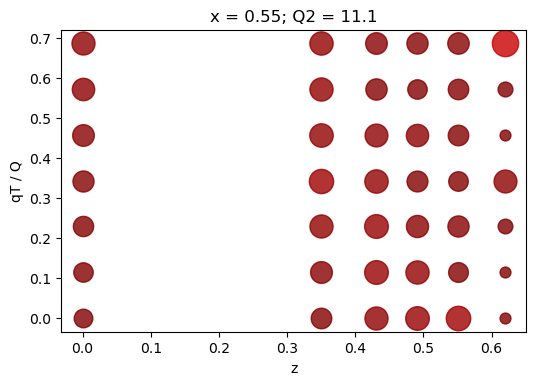

In [479]:
plot.figure(dpi = 100)
for i in range(znum - 1):
    for j in range(qdivnum - 1):
        plot.scatter(zbins[i],qdivQ2bins[j],c = calcaff[i][j],s = (500*calcaff[i][j]**0.2+20),cmap= 'seismic_r', alpha=0.8,vmin=0,vmax=1)
        mystr = "i: {}; j: {}; aff: {}"
#         print(mystr.format(i,j,calcaff[i][j]))

plot.xlabel("z")
plot.ylabel("qT / Q")
plot.title("x = 0.55; Q2 = 11.1")
plot.plot();
# plot.savefig("x_0_55___Q2_11_1.png")

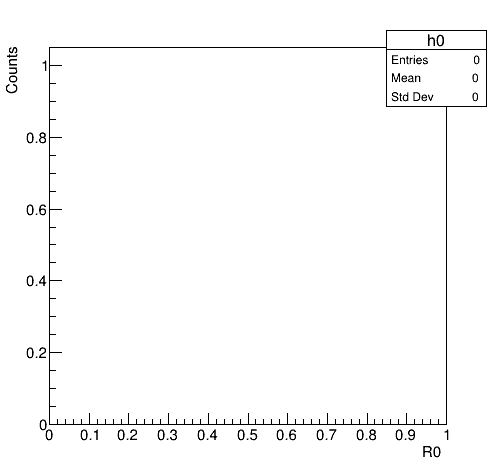

In [304]:
h0 = Q2xbin.Histo1D(("h0",";R0 ;Counts", 100, 0, 1), "R0max")
c = TCanvas("c","c",500,500)
h0.Draw()
c.Draw()